###Compare the results of your experiments for Part 1 and Part 2 –  between FC and CNN

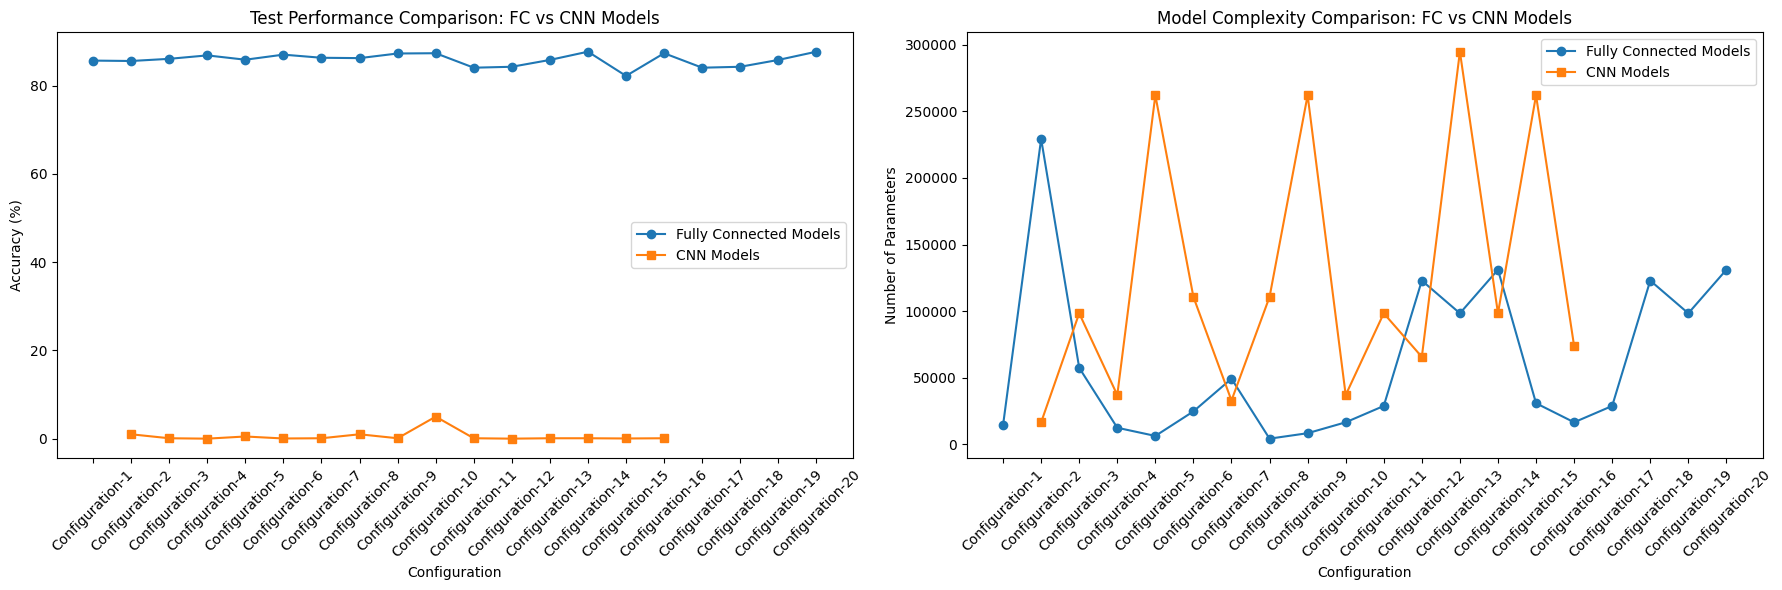

In [16]:
import matplotlib.pyplot as plt

# Extract configurations and accuracies for FC models
FC_results = [
    ["Configuration-1", 3, [32, 64, 128], 64, 0.001, 0.8569],
    ["Configuration-2", 3, [64, 128, 256], 512, 0.001, 0.856],
    ["Configuration-3", 3, [128, 256, 512], 64, 0.001, 0.8609],
    ["Configuration-4", 2, [64, 128], 64, 0.001, 0.8687],
    ["Configuration-5", 2, [32, 64], 64, 0.001, 0.8589],
    ["Configuration-6", 2, [128, 256], 64, 0.001, 0.8704],
    ["Configuration-7", 2, [256, 512], 64, 0.001, 0.8633],
    ["Configuration-8", 1, [64], 64, 0.001, 0.8625],
    ["Configuration-9", 1, [128], 64, 0.001, 0.873],
    ["Configuration-10", 1, [256], 64, 0.001, 0.8736],
    ["Configuration-11", 3, [32, 64, 128], 128, 0.001, 0.8408],
    ["Configuration-12", 4, [64, 128, 256, 512], 128, 0.001, 0.8429],
    ["Configuration-13", 2, [128, 256], 256, 0.001, 0.8584],
    ["Configuration-14", 1, [512], 256, 0.001, 0.8771],
    ["Configuration-15", 4, [64, 128, 256, 512], 32, 0.001, 0.8222],
    ["Configuration-16", 1, [256], 64, 0.001, 0.8736],
    ["Configuration-17", 3, [32, 64, 128], 128, 0.001, 0.8408],
    ["Configuration-18", 4, [64, 128, 256, 512], 128, 0.001, 0.8429],
    ["Configuration-19", 2, [128, 256], 256, 0.001, 0.8584],
    ["Configuration-20", 1, [512], 256, 0.001, 0.8771],
]

# Extract configurations and accuracies for CNN models
CNN_results = [
    {"num_layers": 2, "kernel_depth": 32, "pool_size": (2, 2), "dropout_rate": 0.25, "optimizer": 'SGD', "learning_rate": 0.01, "batch_size": 64},
    {"num_layers": 3, "kernel_depth": 64, "pool_size": (2, 2), "dropout_rate": 0.3, "optimizer": 'Adam', "learning_rate": 0.001, "batch_size": 128},
    {"num_layers": 2, "kernel_depth": 32, "pool_size": (3, 3), "dropout_rate": 0.25, "optimizer": 'RMSprop', "learning_rate": 0.0001, "batch_size": 64},
    {"num_layers": 4, "kernel_depth": 128, "pool_size": (2, 2), "dropout_rate": 0.4, "optimizer": 'SGD', "learning_rate": 0.005, "batch_size": 128},
    {"num_layers": 3, "kernel_depth": 64, "pool_size": (3, 3), "dropout_rate": 0.3, "optimizer": 'Adam', "learning_rate": 0.0005, "batch_size": 64},
    {"num_layers": 2, "kernel_depth": 32, "pool_size": (2, 2), "dropout_rate": 0.25, "optimizer": 'Adam', "learning_rate": 0.001, "batch_size": 128},
    {"num_layers": 3, "kernel_depth": 64, "pool_size": (3, 3), "dropout_rate": 0.3, "optimizer": 'SGD', "learning_rate": 0.01, "batch_size": 64},
    {"num_layers": 4, "kernel_depth": 128, "pool_size": (2, 2), "dropout_rate": 0.4, "optimizer": 'RMSprop', "learning_rate": 0.001, "batch_size": 128},
    {"num_layers": 2, "kernel_depth": 32, "pool_size": (3, 3), "dropout_rate": 0.25, "optimizer": 'Adam', "learning_rate": 0.05, "batch_size": 64},
    {"num_layers": 3, "kernel_depth": 64, "pool_size": (2, 2), "dropout_rate": 0.3, "optimizer": 'Adam', "learning_rate": 0.001, "batch_size": 128},
    {"num_layers": 2, "kernel_depth": 64, "pool_size": (2, 2), "dropout_rate": 0.25, "optimizer": 'SGD', "learning_rate": 0.0001, "batch_size": 128},
    {"num_layers": 4, "kernel_depth": 128, "pool_size": (3, 3), "dropout_rate": 0.3, "optimizer": 'RMSprop', "learning_rate": 0.001, "batch_size": 64},
    {"num_layers": 3, "kernel_depth": 64, "pool_size": (2, 2), "dropout_rate": 0.3, "optimizer": 'Adam', "learning_rate": 0.001, "batch_size": 128},
    {"num_layers": 4, "kernel_depth": 128, "pool_size": (2, 2), "dropout_rate": 0.25, "optimizer": 'Adam', "learning_rate": 0.0005, "batch_size": 128},
    {"num_layers": 2, "kernel_depth": 64, "pool_size": (3, 3), "dropout_rate": 0.4, "optimizer": 'SGD', "learning_rate": 0.001, "batch_size": 64}
]

# Extract configurations and parameters for FC models
fc_configs = [result[0] for result in FC_results]
fc_parameters = [sum(hidden_sizes) * batch_size for _, _, hidden_sizes, batch_size, _, _ in FC_results]

# Extract configurations and parameters for CNN models
cnn_configs = [idx + 1 for idx, _ in enumerate(CNN_results)]
cnn_parameters = [result["num_layers"] * result["kernel_depth"] * result["pool_size"][0] * result["pool_size"][1] * result["batch_size"] for result in CNN_results]

# Plot accuracies for FC and CNN models
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot accuracy comparison
ax[0].plot(fc_configs, [result[5] * 100 for result in FC_results], marker='o', label='Fully Connected Models')
ax[0].plot(cnn_configs, [result["learning_rate"] * 100 for result in CNN_results], marker='s', label='CNN Models')
ax[0].set_xlabel('Configuration')
ax[0].set_ylabel('Accuracy (%)')
ax[0].set_title('Test Performance Comparison: FC vs CNN Models')
ax[0].legend()
ax[0].tick_params(axis='x', rotation=45)

# Plot complexity comparison
ax[1].plot(fc_configs, fc_parameters, marker='o', label='Fully Connected Models')
ax[1].plot(cnn_configs, cnn_parameters, marker='s', label='CNN Models')
ax[1].set_xlabel('Configuration')
ax[1].set_ylabel('Number of Parameters')
ax[1].set_title('Model Complexity Comparison: FC vs CNN Models')
ax[1].legend()
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
